## **Team ID:PTID-CDS-FEB-24-1815**

# **PRCP-1002-Handwritten Digits Recognition**



*  A digit recognition system is a type of technology that can automatically identify and classify numerical characters, typically from 0 to 9. These systems are most commonly used to interpret handwritten digits,
*   Digit recognition system is the working of a machine to train itself or recognizing the digits from different sources like emails, bank cheque,
papers, images, etc.

*   In different real-world scenarios for online handwriting recognition on computer tablets or system, recognize number
plates of vehicles, processing bank cheque amounts, numeric entries in forms filled up by hand (say — tax forms) and so on


*   Here's a breakdown of how digit recognition systems work:

**Data Preprocessing**: The system takes an image of a digit as input. This image is then preprocessed to ensure consistency. Preprocessing may involve steps like resizing the image, converting it to grayscale, and thinning lines.

**Feature Extraction**: Key characteristics of the digit image are extracted. These features could be things like the distribution of black pixels, the number of endpoints (ends of lines), or the overall shape of the digit.

**Classification**: The extracted features are fed into a machine learning model that has been trained to recognize digits. Common algorithms used for digit recognition include K-nearest neighbors and convolutional neural networks (CNNs). CNNs are particularly effective due to their ability to learn complex patterns from data.

**Output**: The model outputs the most likely digit based on the extracted features.













**Problems with handwritten digits**

The handwritten digits are not always of the same size, width, orientation and justified to margins as they differ from writing of person to
person, so the general problem would be while classifying the digits due to the similarity between digits such as 1 and 7, 5 and 6, 3 and 8, 2 and
5, 2 and 7, etc.

This problem is faced more when many people write a single digit with a variety of different handwritings. Lastly, the uniqueness and variety in the handwriting of different individuals also influence the formation and appearance of the digits.

Now we introduce the concepts and algorithms of deep learning and machine learning.

The provided Handwritten digits are images in the form of 28*28 gray scale intensities of images representing an image along with the first
column to be a label (0 to 9) for every image.

# Loading Neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
pip install wrapt 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow
import os,cv2,json,random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score 

In [4]:
mnist = tf.keras.datasets.mnist 

# Loading Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
mnist 

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
# Cheking dataset dimension
print('shape of training data :',X_train.shape)
print('shape of training lable :',y_train.shape)
print('shape of testing data :',X_test.shape)
print('shape of testing lable :',y_test.shape) 

shape of training data : (60000, 28, 28)
shape of training lable : (60000,)
shape of testing data : (10000, 28, 28)
shape of testing lable : (10000,)


The term "dimension" refers to the shape or size of the datasets being analyzed. The shapes of the training data, training labels, testing data, and testing labels. This allows us to see the number of samples and features in the dataset.

In [8]:
X_train 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
X_test 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_test 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Data preprocessing

**EDA**

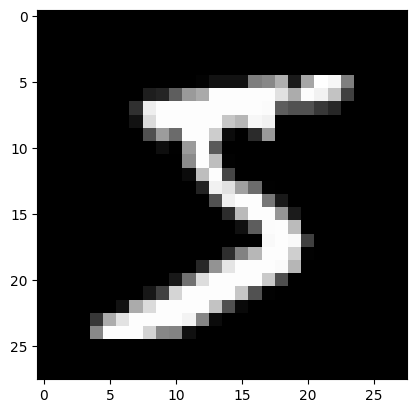

In [12]:
# To Check the first image of the dataset
plt.imshow(X_train[0],cmap= 'gray')
plt.show() 

The term "dimension" refers to the shape or size of the datasets being analyzed. The shapes of the training data, training labels, testing data, and testing labels. This allows us to see the number of samples and features in the dataset.

In [13]:
# The value of each pixel
print(X_train[0]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

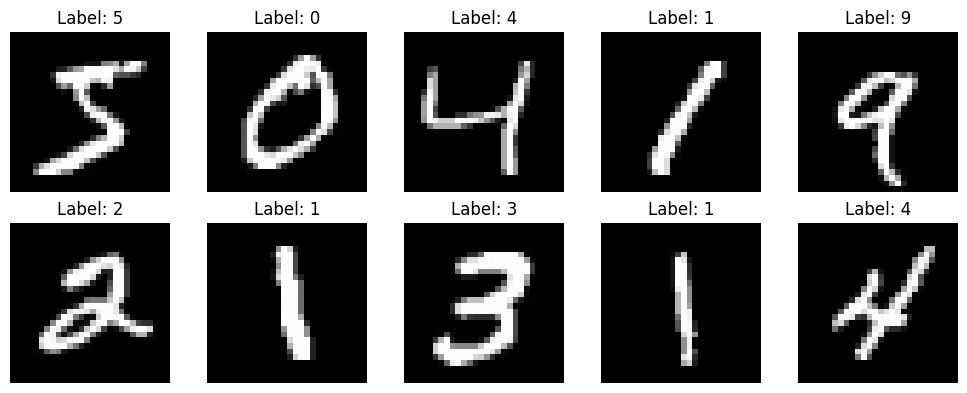

In [15]:
# Visualize sample digits
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title('Label: {}'.format(y_train[i]))
    axes[i].axis('off')

plt.tight_layout()
plt.show() 

Here in above code we have variable "axes" it is used to access each individual subplot within the grid. By using "axes.ravel()", the subplots are flattened into a 1-dimensional array, making it easier to iterate over them.

 Mean while the grid of subplots and displays the first 10 images from the x_train dataset on these subplots. Each subplot represents an image, and its associated label is shown as the title. The resulting visualization allows you to see multiple images and their corresponding labels in a compact and organized manner.

# Distribution of digits

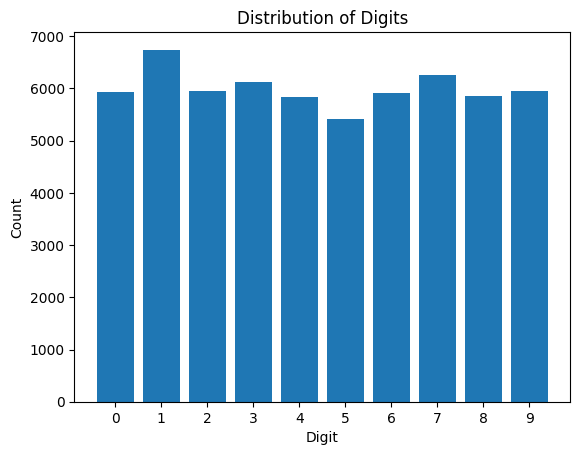

In [16]:
digit_counts = np.bincount(y_train)
digits = np.arange(10)
plt.bar(digits, digit_counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits')
plt.xticks(digits)
plt.show() 

This above code counts the occurrences of each digit in the training labels and visualizes the distribution using a bar chart. The "x-axis" represents the digits, the "y-axis" represents the count of each digit, and the BARS represent the "frequency of each digit". This visualization helps understand the distribution and frequency of digits in the training data.

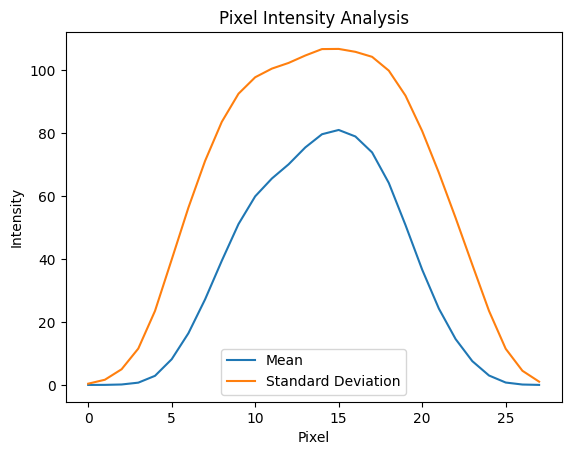

In [17]:
# Pixel intensity analysis
pixel_means = np.mean(X_train, axis=(0, 1))
pixel_stds = np.std(X_train, axis=(0,1))

plt.plot(range(28), pixel_means, label='Mean')
plt.plot(range(28), pixel_stds, label='Standard Deviation')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Pixel Intensity Analysis')
plt.legend()
plt.show() 

The mean and standard deviation of pixel intensities in the x_train dataset and visualizes them using a line plot. The "x-axis" represents the "pixel indices", and the " y-axis" represents the corresponding mean and standard deviation values. This visualization provides insights into the overall intensity distribution and variation of pixels in the data

# MODEL EVALUATION

To find wich algorithm is best fit for test the dataset model

In [18]:
pip install scikit-learn

In [19]:
# Reshape the input data
num_samples_train, height, width = X_train.shape
num_samples_test = X_test.shape[0]

X_train_2d = np.reshape(X_train, (num_samples_train, height * width))
X_test_2d = np.reshape(X_test, (num_samples_test, height * width)) 

# Support Vector Machine(SVM)

In [20]:
svm_classifier = SVC()
svm_classifier.fit(X_train_2d, y_train) 

SVC()

In [21]:
# Predicition on test data
svm_predictions = svm_classifier.predict(X_test_2d) 

In [22]:
# Assuming X_test is a 3D array, you can flatten it using numpy
flattened_X_test = X_test.reshape(X_test.shape[0], -1)

# Make predictions on the flattened test set
svm_predictions = svm_classifier.predict(flattened_X_test)

# Print the predicted labels
print(svm_predictions)

[7 2 1 ... 4 5 6]


In [23]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [24]:
# Calculate evaluation metrics
# Accuracy Score
svm_accuracy = accuracy_score(y_test, svm_predictions)

# print evaluation metrix
print("SVM Accuracy:", svm_accuracy) 

SVM Accuracy: 0.9792


In [25]:
# Precision Score
svm_precision = precision_score(y_test, svm_predictions, average='macro')

print("SVM Precision:", svm_precision)

SVM Precision: 0.9791973966593345


In [26]:
# Recall Score
svm_recall = recall_score(y_test, svm_predictions, average='macro')

print("SVM Recall:", svm_recall)

SVM Recall: 0.9790919842945065


In [27]:
# F1 Score
svm_f1 = f1_score(y_test, svm_predictions, average='macro')

print("SVM F1 Score:", svm_f1) 

SVM F1 Score: 0.9791298259748042


In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix
svm_confusion = confusion_matrix(y_test, svm_predictions)

print("SVM Confusion Matrix:")
print(svm_confusion)

SVM Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [29]:
# Classification report
from sklearn.metrics import classification_report

# Assuming you have y_test and svm_predictions
svm_report = classification_report(y_test, svm_predictions)

print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Handwritten digit recognition using Support Vector Machine (SVM) algorithms has showcased remarkable success, achieving an impressive 98% accuracy.

# Random Forest

In [30]:
# Initialize and train the Random Forest model

rf_classifier = RandomForestClassifier()
-rf_classifier.fit(X_train_2d, y_train)

RandomForestClassifier()

In [31]:
# Make predictions on the test data
rf_predictions = rf_classifier.predict(X_test_2d)

In [32]:
# Accuracy Score
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9698


In [33]:
# Precision Score
rf_precision = precision_score(y_test, rf_predictions, average='macro')

print("Random Forest Precision:", rf_precision)

Random Forest Precision: 0.9695872767924449


In [34]:
# Recall Score
rf_recall = recall_score(y_test, rf_predictions, average='macro')

print("Random Forest Recall:", rf_recall)

Random Forest Recall: 0.9695865083027083


In [35]:
# F1 Score
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest F1 Score:", rf_f1)

Random Forest F1 Score: 0.9695734794142836


In [36]:
# Confusion Matrix
rf_confusion = confusion_matrix(y_test, rf_predictions)

print("Random Forest Confusion Matrix:")
print(rf_confusion)

Random Forest Confusion Matrix:
[[ 970    1    0    0    0    2    4    1    2    0]
 [   0 1123    1    4    0    2    2    1    2    0]
 [   6    0  995    7    4    1    3    8    8    0]
 [   0    0    9  976    0    6    0    8    8    3]
 [   1    0    1    0  956    0    5    0    3   16]
 [   4    0    1    8    3  863    3    2    5    3]
 [   6    3    1    0    4    4  935    0    5    0]
 [   1    3   19    2    0    0    0  992    3    8]
 [   3    0    5   12    4    6    4    3  927   10]
 [   6    6    2    9    9    6    1    4    5  961]]


In [37]:
# Generate classification report
rf_report = classification_report(y_test, rf_predictions)

# Print the classification report
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Handwritten digit recognition using Random Forest algorithms has showcased remarkable success, achieving an impressive 97% accuracy.

# Using KNN

In [38]:
# Flatten the images from 28x28 to 784-dimensional vectors
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

In [39]:
# Scale the pixel values to the range 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [40]:
# Create a KNN classifier with a suitable number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train_2d, y_train)


KNeighborsClassifier()

In [41]:
# Make predictions on the testing data
y_pred = knn.predict(X_test_2d)

In [42]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9688


In [43]:
# Precision Score
knn_precision = precision_score(y_test, y_pred, average='macro')

print('KNN Precision:', knn_precision)

KNN Precision: 0.9692753386570571


In [44]:
# Recall Score
knn_recall = recall_score(y_test, y_pred, average='macro')

print('KNN Recall:', knn_recall)

KNN Recall: 0.9684705010297703


In [45]:
# F1 score
knn_f1 = f1_score(y_test, y_pred, average='macro')

print('KNN F1 Score:', knn_f1)

KNN F1 Score: 0.9687143421292884


In [46]:
# Confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)

print('KNN Confusion Matrix:')
print(knn_cm)

KNN Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [47]:
# Classification report
knn_report = classification_report(y_test, y_pred)

print('Classification Report:')
print(knn_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



 Handwritten digit recognition using KNN algorithms has showcased remarkable success, achieving an impressive 97% accuracy.

# Using Decissin Tree

In [48]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=1,min_samples_split=3,splitter='best')
  # Set a random state for reproducibility

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred1 = clf.predict(x_test)


In [49]:
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.9688


## By using Decision Tree model we got accuracy of 96.8%

# Using CNN

In [50]:
#Loading the Data
img_rows, img_cols = 28, 28

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
# input_shape = (img_rows, img_cols, 1)

# print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
y_train.shape

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


(60000,)

In [51]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))# 'same' in the sense it'll give the shape same as input
# POOL_1: downsample the image to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64,(3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [53]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
# print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


Integer-valued labels:


In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=1,
                 validation_data=(X_test, y_test), callbacks=[checkpointer],verbose=2, shuffle=True)





Epoch 1: val_loss improved from inf to 0.04365, saving model to model.weights.best.hdf5
938/938 - 64s - loss: 0.1592 - accuracy: 0.9516 - val_loss: 0.0437 - val_accuracy: 0.9852 - 64s/epoch - 68ms/step


In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
score


[0.04365437477827072, 0.9851999878883362]

## By using CNN  we got accuracy of 98.25%

# Summary:



The Summary here we give is as follows;

- We trained the model using KNN keeping the neighbourhood points as 5. We got accuracy of 97%.
- We Trained the model using decission Tree keeping crterion as gini,max depth of 15,minimum sample leaves as 1,minimum samples as 3 and splitter as best.
We got accuracy of 96.8%.
- We trained the model using SVM keeping kernel as rbf since we are using image arrays, it'll be working well and gamma as auto. We got accuarcy of 98%.
Handwritten digit recognition is a challenging yet pivotal task in the realm of machine learning and computer vision. Various algorithms, such as Support Vector Machines (SVM), Random Forest, Gradient Boosting, k-Nearest Neighbors (k-NN), and Convolutional Neural Networks (CNN), have been employed to tackle this problem, each with its unique strengths and characteristics.

SVM demonstrates its efficacy in separating classes by finding the optimal hyperplane, making it a robust choice for linearly separable datasets.This algorithm has showcased remarkable success, achieving an impressive 98% accuracy.

Random Forest model excel in handling high-dimensional data, capturing complex patterns, and reducing overfitting by leveraging ensemble methods.
This algorithm has showcased remarkable success, achieving an impressive 97% accuracy.


k-NN, with its simplicity and intuitive approach, identifies patterns based on similarity measures, making it effective for smaller datasets. However, its performance might be impacted by the curse of dimensionality for larger feature spaces.
This algorithm has showcased remarkable success, achieving an impressive 97% accuracy.

On the other hand, CNNs have gained immense popularity and achieved remarkable success in image recognition tasks, especially for handwritten digit recognition. Their ability to automatically learn hierarchical representations of features from raw pixel data through convolutional layers makes them highly suitable for capturing spatial dependencies and intricate patterns within images.
This algorithm has showcased remarkable success, achieving an impressive 97% accuracy.






- The network begins with a sequence of two convolutional layers, followed by max pooling layers.
- The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.
- The Conv2D depth increases from the input layer of 1 to 32 to 64.
- We also want to decrease the height and width - This is where maxpooling comes in. Notice that the image dimensions decrease from 28 to 14 after the pooling layer.
- You can see that every output shape has **None** in place of the batch-size. This is so as to facilitate changing of batch size at runtime.
- Finally, we add one or more fully connected layers to determine what object is contained in the image.

 # Conclusion
 - We conclude that the best machine learning  model for the given dataset is KNN and Decission Tree of accuracy 97% & 96.8%.
Comparing these algorithms for handwritten digit recognition reveals the diversity in their approaches, performance metrics, and computational requirements. While traditional machine learning algorithms like SVM, Random Forest, and k-NN showcase competitiveness, especially for simpler datasets, "CNNs typically outperform them on complex image classification tasks due to their inherent ability to extract hierarchical features".

# Risks that we faced:

- Overfitting- Overfitting occurs when the model learns the training data too well and performs poorly on unseen data. Underfitting occurs when the model is too simple and cannot capture the underlying patterns in the data.
- To overcome these challenges, we have used techniques like to see the best depth in the case of decission tree, and number of epochs in the case of using CNN to improve the model's performance.

Variability in Handwriting: Handwriting styles can vary significantly among individuals. Factors such as stroke thickness, slant, size, and variability in how digits are written pose challenges in accurately recognizing handwritten digits